# 사전작업

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, GRU, Bidirectional, GlobalMaxPooling1D,GlobalAveragePooling1D, Dropout,SpatialDropout1D,Conv1D,concatenate,Flatten
#Bidirectional은 양방향으로 데이터를 보기 위해서 사용되는 함수
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
#데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# cutoff = int(len(data)*0.7)
# train_data = data[:cutoff]
# test_data = data[cutoff:]

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [ ]:
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r"what's", "what is ", text)
#     text = re.sub(r"\'s", " ", text)
#     text = re.sub(r"\'ve", " have ", text)
#     text = re.sub(r"can't", "cannot ", text)
#     text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
#     text = re.sub(r"\'re", " are ", text)
#     text = re.sub(r"\'d", " would ", text)
#     text = re.sub(r"\'ll", " will ", text)
#     text = re.sub(r"\'scuse", " excuse ", text)
#     text = re.sub('\W', ' ', text)
#     text = re.sub('\s+', ' ', text)
#     text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
#     text = [lemmatizer.lemmatize(token, "v") for token in text]
#     text = [word for word in text if not word in stop_words]
#     text = " ".join(text)
#     text = text.strip(' ')
#     return text

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# X_train_raw = train_data['review'].map(lambda com : clean_text(com))
# X_test_raw = test_data['review'].map(lambda com : clean_text(com))
X = data['review'].map(lambda com : clean_text(com))
# Y_train = train_data['sentiment']
y = data['sentiment']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GlobalMaxPool1D

In [ ]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
list_tokenized_train = tokenizer.texts_to_sequences(X)

maxlen = 130
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
y = data['sentiment']



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_t,y,test_size=0.3,random_state=12,stratify=y)

In [ ]:
x_train.shape

(35000, 130)

In [ ]:
embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(2, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train.shape, y_train_one.shape

((35000, 130), (35000, 2))

In [ ]:
batch_size = 100
epochs = 20
model.fit(x_train,y_train_one, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
280/280 [==============================] - 6s 21ms/step - loss: 0.1428 - accuracy: 0.9505 - val_loss: 0.3454 - val_accuracy: 0.8676
Epoch 2/20
280/280 [==============================] - 5s 18ms/step - loss: 0.1004 - accuracy: 0.9680 - val_loss: 0.4300 - val_accuracy: 0.8597
Epoch 3/20
280/280 [==============================] - 5s 18ms/step - loss: 0.0779 - accuracy: 0.9747 - val_loss: 0.4342 - val_accuracy: 0.8599
Epoch 4/20
280/280 [==============================] - 5s 18ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.4837 - val_accuracy: 0.8610
Epoch 5/20
280/280 [==============================] - 5s 18ms/step - loss: 0.0381 - accuracy: 0.9896 - val_loss: 0.6072 - val_accuracy: 0.8591
Epoch 6/20
280/280 [==============================] - 5s 17ms/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.6532 - val_accuracy: 0.8574
Epoch 7/20
280/280 [==============================] - 5s 18ms/step - loss: 0.0182 - accuracy: 0.9962 - val_loss: 0.6829 - val_accuracy: 0.8600

In [ ]:
y[y=='positive'] = 1
y[y=='negative'] = 0

In [ ]:
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (50000,)
y shape :  (50000,)


In [ ]:
X[0]

'one reviewer ha mention watch 1 oz episode hook right exactly happen br br first thing strike oz wa brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy deal shady agreement never far away br br would say main appeal show due fact go show would dare forget pretty picture paint mainstream audience forget charm forget romance oz doe mess around first episode ever saw strike nasty wa surreal could say wa ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison exp

In [ ]:
# print("X train shape : ", X_train_raw.shape)
# print("X test shape : ", X_test_raw.shape)
# print("y train shape : ", Y_train.shape)

X train shape :  (35000,)
X test shape :  (15000,)
y train shape :  (35000,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)

# 토큰화 작업하기

In [ ]:
# max_features=90000
# maxlen=90
# embed_size=300


# tok=Tokenizer(num_words=max_features,lower=True)
# tok.fit_on_texts(X_train_raw)
# tok.fit_on_texts(X_test_raw)
# X_train = sequence.pad_sequences(tok.texts_to_sequences(X_train_raw),
#                         maxlen = maxlen, truncating = "pre")
# X_test = sequence.pad_sequences(tok.texts_to_sequences(X_test_raw),
#                        maxlen = maxlen, truncating = "pre")

In [ ]:
max_features=90000
maxlen=90
embed_size=300


tok=Tokenizer(num_words=max_features,lower=True)
tok.fit_on_texts(x_train)
tok.fit_on_texts(x_test)
X_train = sequence.pad_sequences(tok.texts_to_sequences(x_train),
                        maxlen = maxlen, truncating = "post")
X_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),
                       maxlen = maxlen, truncating = "post")

In [ ]:
word_index = tok.word_index

In [ ]:
len(word_index)

82866

In [ ]:
word_index = {e:i for e,i in word_index.items() if i <= max_features}

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.9, random_state=199)
# print(x_train.shape," ",y_train.shape," ",x_val.shape," ",y_val.shape)

(31500, 90)   (31500,)   (3500, 90)   (3500,)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-10-27 07:09:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-27 07:09:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-27 07:09:08--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... ^C
Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either

In [ ]:
embedding_dict = dict()
f = open('/content/drive/MyDrive/glove.6B.300d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 300개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [ ]:
embedding_matrix = np.zeros((max_features, 300))

In [ ]:
for word, i in word_index.items():
  tmp = embedding_dict.get(word)
  if tmp is not None:
    embedding_matrix[i-1] = tmp

# 모델 구성하기

In [ ]:
print(x_train.shape," ",y_train.shape)

(35000,)   (35000,)


In [ ]:
input = Input(shape=(maxlen, )) 
layer = Embedding(max_features, 300, weights=[embedding_matrix], input_length=maxlen, trainable=True)(input)
layer = Conv1D(128, kernel_size = 3)(layer)   
layer = Conv1D(64, kernel_size = 3)(layer)
# layer = Conv1D(256,kernel_size=3)(layer)  
avg_pool = GlobalAveragePooling1D()(layer)
max_pool = GlobalMaxPooling1D()(layer)
layer = concatenate([avg_pool, max_pool])

layer = Dense(50,activation='relu')(layer)
layer = Flatten()(layer)
layer= Dense(2, activation="sigmoid")(layer)
model = Model(inputs = input, outputs = layer)  
model.summary()
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 90)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 90, 300)      27000000    ['input_7[0][0]']                
                                                                                                  
 conv1d_15 (Conv1D)             (None, 88, 128)      115328      ['embedding_6[0][0]']            
                                                                                                  
 conv1d_16 (Conv1D)             (None, 86, 64)       24640       ['conv1d_15[0][0]']              
                                                                                            

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
file_path = '{epoch:02d}-{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(file_path,monitor='val_loss',verbose = 1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
y_train[y_train=='positive'] = 1
y_train[y_train=='negative'] = 0
y_val[y_val=='positive'] = 1
y_val[y_val=='negative'] = 0

In [ ]:
from tensorflow.keras.utils import to_categorical 
y_train_one = to_categorical(y_train)
y_val_one = to_categorical(y_test)

In [ ]:
# hist = model.fit(x_train, y_train_one, epochs=3,batch_size=256, validation_data=(x_val,y_val_one), callbacks= [checkpoint,early_stop])

Epoch 1/3
124/124 [==============================] - ETA: 0s - loss: 0.5981 - accuracy: 0.6674
Epoch 1: val_loss improved from inf to 0.48281, saving model to 01-0.48281.h5
124/124 [==============================] - 6s 41ms/step - loss: 0.5981 - accuracy: 0.6674 - val_loss: 0.4828 - val_accuracy: 0.7717
Epoch 2/3
123/124 [============================>.] - ETA: 0s - loss: 0.3567 - accuracy: 0.8431
Epoch 2: val_loss improved from 0.48281 to 0.36842, saving model to 02-0.36842.h5
124/124 [==============================] - 4s 33ms/step - loss: 0.3566 - accuracy: 0.8431 - val_loss: 0.3684 - val_accuracy: 0.8320
Epoch 3/3
122/124 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9222
Epoch 3: val_loss did not improve from 0.36842
124/124 [==============================] - 3s 26ms/step - loss: 0.2019 - accuracy: 0.9222 - val_loss: 0.3861 - val_accuracy: 0.8386


In [ ]:
hist = model.fit(X_train,y_train_one,validation_split=0.2,epochs=100,batch_size= 128,verbose=1,callbacks=[checkpoint,early_stop])

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 0.1663 - accuracy: 0.9381
Epoch 1: val_loss improved from inf to 0.43353, saving model to 01-0.43353.h5
219/219 [==============================] - 3s 15ms/step - loss: 0.1661 - accuracy: 0.9381 - val_loss: 0.4335 - val_accuracy: 0.8330
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9719
Epoch 2: val_loss did not improve from 0.43353
219/219 [==============================] - 3s 13ms/step - loss: 0.0856 - accuracy: 0.9719 - val_loss: 0.5916 - val_accuracy: 0.8034
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9874
Epoch 3: val_loss did not improve from 0.43353
219/219 [==============================] - 3s 12ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.5321 - val_accuracy: 0.8374
Epoch 4/100
217/219 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9938
Epoch 4: val_loss did not improve from 0.433

In [ ]:
import matplotlib.pyplot as plt
def acc_loss_plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc = 'upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

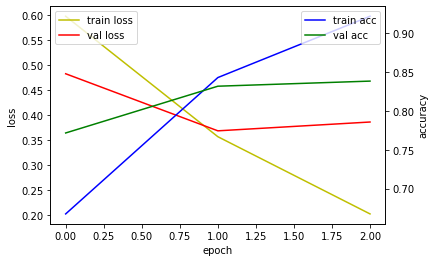

In [ ]:
acc_loss_plot(hist)

In [ ]:
# y_test = test_data['sentiment'] 
# y_test[y_test=='positive'] = 1
# y_test[y_test=='negative'] = 0
y_test_one = to_categorical(y_test)

In [ ]:
y_test_one

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
score = model.evaluate(X_test,y_test_one)

469/469 [==============================] - 2s 3ms/step - loss: 1.1078 - accuracy: 0.8295


In [ ]:
score[1]

0.8469333052635193